# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [20]:
##########################
# To do:
#
# Split into validate chunks for cross validation
# Augment the data
# Visualize the weights
# (Figure out why setting the seed does not make determinate results.)
# Tweak hyperparameters to improve score.
##########################

In [21]:
import tensorflow as tf
print ("Done")
seed = 42

Done


In [22]:
# Load pickled data
import pickle
import pandas as pd

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./train.p"
testing_file = "./test.p"
signnames_file = "./signnames.csv"

try:
    csv_file = open(signnames_file, 'r')
    
    with open(training_file, mode='rb') as f:
        train = pickle.load(f)
    with open(testing_file, mode='rb') as f:
        test = pickle.load(f)
except IOError as my_error:
    raise IOError("Trouble opening sign data files! Error: {}".format(my_error.strerror))

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

df = pd.read_csv(csv_file)
sign_types = df.SignName


print("Files loaded.")

assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Test Set:       {} samples".format(len(X_test)))
print("Signs:          {}".format(len(sign_types)))

Files loaded.

Image Shape: (32, 32, 3)

Training Set:   39209 samples
Test Set:       12630 samples
Signs:          43


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


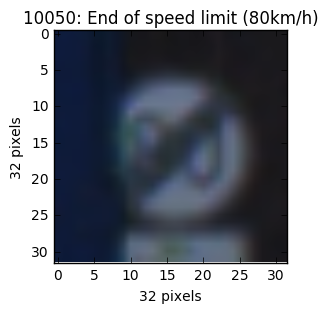

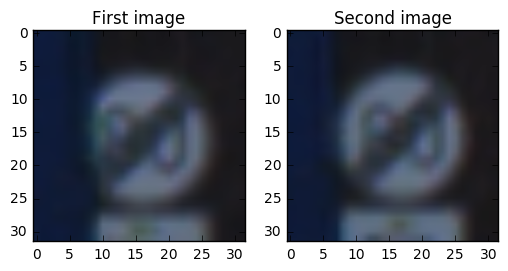

In [23]:
### Replace each question mark with the appropriate value.
import matplotlib.pyplot as plt

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of each traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(sign_types)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

def show_train_sign(train_index = 100):
    plt.figure(figsize=(3,3))
    plt.title("{}: {}".format(train_index,sign_types[y_train[train_index]]))
    plt.ylabel("{} pixels".format(image_shape[0]))
    plt.xlabel("{} pixels".format(image_shape[1]))
    plt.imshow(X_train[train_index])

def show_multiple_images(train_index = 100):
    fig = plt.figure()

    fig.add_subplot(1,2,1)
    plt.title("First image")
    plt.imshow(X_train[train_index])
    fig.add_subplot(1,2,2)
    plt.title("Second image")
    plt.imshow(X_train[train_index+1])

    plt.show()  # IMPORTANT : uncomment when running from Jupyter Notebook

show_train_sign(10050)
show_multiple_images(10050)

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [24]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# import cv2

# Visualizations will be shown in the notebook.
%matplotlib inline

# Make this a function so it can more easily be commented in and out
def print_sample(X_train, y_train):
    for i in range(20):
        show_train_sign(i*30*7)

# print_sample(X_train, y_train)

print ("Done")

Done


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [25]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state = seed)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

In [26]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split

X_train_split, X_validation, y_train_split, y_validation = train_test_split(
    X_train,
    y_train,
    test_size= 1/5,
    random_state=seed)



In [27]:
print("Verify:")
print("X_split + X_valid = X_train ")
print( len(X_train_split), "+", len(X_validation), "=", len(X_train_split) + len(X_validation))
print("X_train: ", len(X_train))

Verify:
X_split + X_valid = X_train 
31367 + 7842 = 39209
X_train:  39209


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [28]:
# These are all the hyperparameters that affect your output in a meaningful way

# Layer setup

# Session running
EPOCHS = 10
BATCH_SIZE = 128


In [29]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
# import tensorflow as tf

from tensorflow.contrib.layers import flatten

def LeNet(x):    

    # Hyperparameters: used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    global seed

    ###########################
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    #
    # In this layer, we are convoling the image itself into tiny feature patches.
    #   The features are no bigger than 5x5 patches of each image collapsed into each output pixel at depth 6.
    #   The features are created randomly, and then learned into stronger features 
    #   as the CNN learns what's important.
    # 
    # Notes:
    # tf.truncated_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=42, name=None)
    # "Recall the shape has dimensions: (height, width, input_depth, output_depth)."
    # "out_height = ceil(float(32 - 5 + 1) / float(1)) = 28
    # "out_width = ceil(float(32 - 5 + 1) / float(1)) = 28
    # Shape: the shape of the convolution patch: 5x5, for all 3 color channels, and output a 1x6 output vector
    # This shape is moved across the image and multiplied by all the pixels within that patch
    L1_kernal = 5
    L1_input_depth = 3 # Note: RGB
    L1_output_depth = 6
    L1_shape=(L1_kernal, L1_kernal, L1_input_depth, L1_output_depth)
    # Stride: this is how the patch is moved alone the image
    #   strides = [1, 2, 2, 1] # (batch, height, width, depth)
    #   Parameters: how many images to skip, how many pixels in X, Y to skip, how many color chanels to skip
    L1_stride = [1, 1, 1, 1]
    # The padding affects how the filter handles the edge
    # VALID means keeps the kernal within the image, SAFE pads the image with zeros to accomplish this
    L1_padding = 'VALID'

    conv1_W = tf.Variable(tf.truncated_normal(L1_shape, mean = mu, stddev = sigma, seed=seed))
    conv1_b = tf.Variable(tf.zeros(L1_output_depth))
    conv1   = tf.nn.conv2d(x, conv1_W, L1_stride, padding=L1_padding) + conv1_b
    
    print("Conv 1 done 28x28x6")
    print(conv1.get_shape())

    ###########################
    # Activation: ReLU
    #
    conv1 = tf.nn.relu(conv1)

    print("Activation 1 done")
    ###########################
    # Maxooling: Input = 28x28x6. Output = 14x14x6.
    #
    # Pooling takes a look at a patch of *features* and picks the most important one.
    #   This simplifies the layer as it moves through the CNN
    #
    # The double strides takes 28 down by half in both directions
    # "new_height = ceil(float(28 - 2 + 1) / float(2)) = ceil(13.5) = 14
    # "new_width = ceil(float(28 - 2 + 1) / float(2)) = ceil(13.5) = 14
    # Maxpool: Pool this size patch of features and pick the largest one
    # Note: ***DOES NOT OVERLAP*** The stride is the same as the patch so each pool is separate.
    L1_maxpool_ksize = [1, 2, 2, 1] # [1, ??, ??, 1] -- size of the patch to pool. It doesn't really make sense to change the outer strides
    L1_maxpool_stride = L1_maxpool_ksize # These match so you pool unique groups

    conv1 = tf.nn.max_pool(conv1, ksize=L1_maxpool_ksize, strides=L1_maxpool_stride, padding=L1_padding)

    print("Maxpool 1 done 14x14x16")
    print(conv1.get_shape())
    ###########################
    # Layer 2: Convolutional. Output = 10x10x16.
    #
    # In this layer, we are convoling groups of features into larger feature groups, I'll call "metafeatures".
    #   This is similar to the dog's nose as a group of nostrils and curves.
    #   In other words, this does the equivalent of taking small features, like nostrils 
    #   and curves, and outputs a nose.  (Except this time with street signs.)
    #   The importance (weight) of each feature is randomly chosen, and evolved over time.
    #
    # Notes:
    # conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    L2_kernal = 5
    L2_output_depth = 16 # Note: the number of new filters
    L2_shape=(L2_kernal, L2_kernal, L1_output_depth, L2_output_depth)
    L2_stride = [1, 1, 1, 1]
    L2_padding = 'VALID'

    conv2_W = tf.Variable(tf.truncated_normal(shape=L2_shape, mean = mu, stddev = sigma, seed=seed))
    conv2_b = tf.Variable(tf.zeros(L2_output_depth)) 
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=L2_stride, padding=L2_padding) + conv2_b
    
    print("Conv 2 done 10x10x16")
    print(conv2.get_shape())
    print( L2_shape, L2_stride, L2_output_depth)
    ###########################
    # Activation: ReLU
    conv2 = tf.nn.relu(conv2)

    print("Activation 2 done")
    ###########################
    # Maxooling
    #
    # Pooling takes a look at a patch of metafeatures and picks the most important one.
    #   This simplifies the layer further
    #
    # Input = 10x10x16. Output = 5x5x16.
    # The double strides take the 10 down to 5 in both directions.
    L2_maxpool_ksize = [1, 2, 2, 1]
    L2_maxpool_stride = L2_maxpool_ksize

    conv2 = tf.nn.max_pool(conv2, ksize=L2_maxpool_ksize, strides=L2_maxpool_stride, padding='VALID')

    print("Maxpool 2 done 5x5x16")
    print(conv2.get_shape())

    ###########################
    # Flatten: Input = 5x5x16. Output = 1x400 = flatten_size
    #
    # The point to these next steps is to prepare to make a guess for what objects are in this image.
    #
    # To those ends, we have, so far, identified a bunch of small features (L1) and linked them
    #   to larger features groups (L2), and deciding which among them was the most important at each layer.
    #
    # We now start to connect these features together to make a guess.
    #
    # They are fully connected, because we want these feature sets to have influence across the entire image.
    #
    # 
    # "The flatten function flattens a Tensor into two dimensions: (batches, length). 
    # "The batch size remains unaltered, so all of the other dimensions of the input 
    # "Tensor are flattened into the second dimension of the output Tensor.
    #
    # "In this model, the the output shape of Pooling Layer 2 should be 5x5x16 
    # "(ignoring batch size). Applying flatten will multiply the length of each 
    # "dimension together, which equals 400.
    # This size is the fall through of all the transforms downward:
    # 32x32x3 -> 28x28x6 -> 14x14x6 -> 10x10x16 -> 5x5x16 -> 400
    # Doing the math here, would not increase readability.
    flatten_size = 400
    fc0   = flatten(conv2)
    
    print("Flatten 2 done")
    print(fc0.get_shape())
    ###########################
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    #
    # fc1_W = tf.Variable(tf.truncated_normal(shape=(flatten_size, 120), mean = mu, stddev = sigma))
    L3_output_depth = 120

    fc1_W = tf.Variable(tf.truncated_normal(shape=(flatten_size, L3_output_depth), mean = mu, stddev = sigma, seed=seed))
    fc1_b = tf.Variable(tf.zeros(L3_output_depth))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    print("Conv 3 done")
    ###########################
    # Activation: ReLU
    fc1    = tf.nn.relu(fc1)

    print("Activation 3 done")
    ###########################
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    # fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    L4_output_depth = 84

    fc2_W  = tf.Variable(tf.truncated_normal(shape=(L3_output_depth, L4_output_depth), mean = mu, stddev = sigma, seed=seed))
    fc2_b  = tf.Variable(tf.zeros(L4_output_depth))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    print("Conv 4 done")
    ###########################
    # Activation: ReLU
    fc2    = tf.nn.relu(fc2)

    print("Activation 4 done")
    ###########################
    # Layer 5: Fully Connected. Input = 84. Output = 43. Note: 43 is the number of classes of signs.
    # fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    #global n_classes
    L5_output_depth = n_classes

    fc3_W  = tf.Variable(tf.truncated_normal(shape=(L4_output_depth, L5_output_depth), mean = mu, stddev = sigma, seed=seed))
    fc3_b  = tf.Variable(tf.zeros(L5_output_depth))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    print("Conv 5 done")
    return logits

print ("Done")

Done


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [30]:
### Train your model here.
### Feel free to use as many code cells as needed.
#x = tf.placeholder(tf.float32, (None, 32, 32, 1))
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
#one_hot_y = tf.one_hot(y, 10)
one_hot_y = tf.one_hot(y, len(sign_types))

rate = 0.001

logits = LeNet(x)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

print("Done setting up the model.")

Conv 1 done 28x28x6
(?, 28, 28, 6)
Activation 1 done
Maxpool 1 done 14x14x16
(?, 14, 14, 6)
Conv 2 done 10x10x16
(?, 10, 10, 16)
(5, 5, 6, 16) [1, 1, 1, 1] 16
Activation 2 done
Maxpool 2 done 5x5x16
(?, 5, 5, 16)
Flatten 2 done
(?, 400)
Conv 3 done
Activation 3 done
Conv 4 done
Activation 4 done
Conv 5 done
Done setting up the model.


In [31]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './Kiki_save')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.808

EPOCH 2 ...
Validation Accuracy = 0.910

EPOCH 3 ...
Validation Accuracy = 0.947

EPOCH 4 ...
Validation Accuracy = 0.963

EPOCH 5 ...
Validation Accuracy = 0.969



### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [45]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.



### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [46]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print("Seed = {} = {:.3f}".format(seed, 0.884))

Test Accuracy = 0.888
Seed = 42 = 0.884


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.